Values of prediction using number of pixels and occlusion:
R^2=[-82.58], MSE=[15049.44], MAD=[103.34]


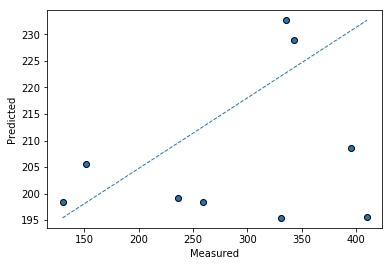

In [73]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, median_absolute_error as mad
import matplotlib.pyplot as plt
import numpy as np
import sys

# Loads the dataset passed by parameter when the script is called
#df = pd.read_csv(sys.argv[1])
df = pd.read_csv('../src/test/resources/result_info/FinalResults.csv')

x = df[['nr_pixels', 'occlusion']]
#x = df[['nr_pixels']]

y = df['weight']

# The dataset is divided in training (70%) and test (30%) using random selection
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

reg = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
reg.fit(x_train, y_train)

# Prediction of the weight (w)
w = reg.predict(x_test)

# Explained variance score: 1 is perfect prediction, the mean squared error and median absolute error
print('Values of prediction using number of pixels and occlusion:')
#print('Values of prediction using number of pixels:')
print('R^2=[%.2f], MSE=[%.2f], MAD=[%.2f]' % (r2(w,y_test), mse(w, y_test), mad(w, y_test)))

# Plotting the results
fig, ax = plt.subplots()
ax.scatter(y_test, w, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [w.min(), w.max()], '--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()